<a href="https://colab.research.google.com/github/aparnavinayankozhipuram/Mistral-7B-Evaluation/blob/main/confidenceinterval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

              Model      BLEU    CI Low   CI High
0         TinyLlama  0.016050  0.004640  0.027457
1     RAG TinyLlama  0.020489  0.013487  0.027492
2        Mistral-7B  0.040071  0.024735  0.055407
3    RAG Mistral-7B  0.064307  0.042347  0.086268
4      Llama-3.1 8B  0.008194  0.002810  0.013569
5  RAG Llama-3.1 8B  0.025970  0.005860  0.046080
6         Llama-13B  0.017217  0.004020  0.030410
7     RAG Llama-13B  0.031080  0.015440  0.046717


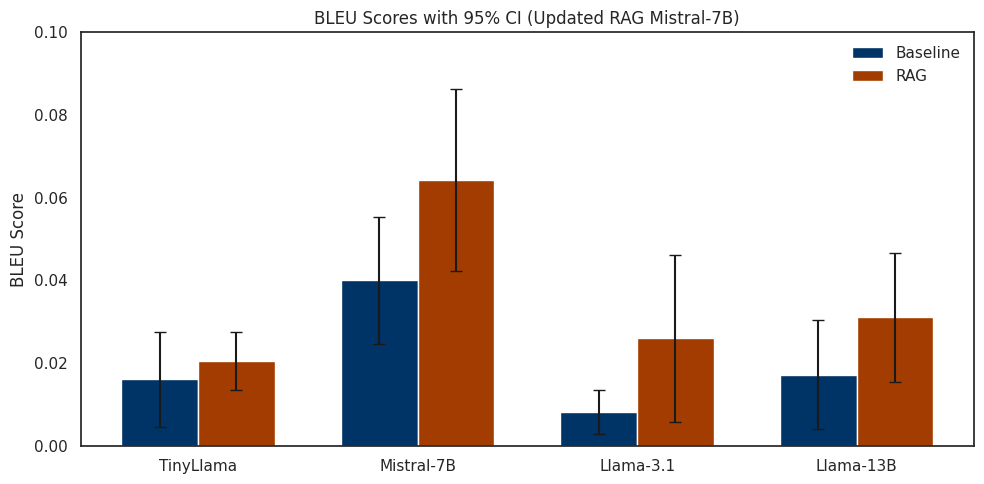

In [2]:

sns.set_theme(style='white',font='DejaVu Sans')
# updated data
models=['TinyLlama','RAG TinyLlama','Mistral-7B','RAG Mistral-7B','Llama-3.1 8B','RAG Llama-3.1 8B','Llama-13B','RAG Llama-13B']
bleu=[0.0160504,0.020489,0.0400714,0.064307,0.0081942,0.02597,0.0172173,0.03108]
ci_low=[0.00464,0.01348693264,0.024735,0.04234674555,0.00281,0.00586,0.00402,0.01544]
ci_high=[0.027457,0.02749157976,0.055407,0.08626813049,0.013569,0.04608,0.03041,0.046717]

df=pd.DataFrame({'Model':models,'BLEU':bleu,'CI Low':ci_low,'CI High':ci_high})
print(df)
# plot
pairs=[('TinyLlama','RAG TinyLlama'),('Mistral-7B','RAG Mistral-7B'),('Llama-3.1 8B','RAG Llama-3.1 8B'),('Llama-13B','RAG Llama-13B')]
blue='#003366'; orange='#A33C00'; width=0.35
fig,ax=plt.subplots(figsize=(10,5))
for idx,(base,rag) in enumerate(pairs):
    b=df[df['Model']==base].iloc[0]
    ax.bar(idx-width/2,b['BLEU'],width,color=blue,label='Baseline' if idx==0 else "",yerr=[[b['BLEU']-b['CI Low']],[b['CI High']-b['BLEU']]],capsize=4)
    r=df[df['Model']==rag].iloc[0]
    ax.bar(idx+width/2,r['BLEU'],width,color=orange,label='RAG' if idx==0 else "",yerr=[[r['BLEU']-r['CI Low']],[r['CI High']-r['BLEU']]],capsize=4)
ax.set_xticks(range(len(pairs)))
ax.set_xticklabels([b.split()[0] for b,_ in pairs])
ax.set_ylabel('BLEU Score')
ax.set_title('BLEU Scores with 95% CI (Updated RAG Mistral-7B)')
ax.set_ylim(0,0.1)
ax.legend(loc='upper right',frameon=False)
plt.tight_layout()
plt.savefig('BLEU_grouped_pairs_final.png',dpi=300)
